## Load and Clean Data

In [3]:
import pandas as pd

df = pd.read_csv('house_prices.csv')
df_new = df[df.BldgType=='1Fam'].copy()
df_new = df_new.dropna()
df_new.head()

,Id,BldgType,LotArea,GrLivArea,YearBuilt,YrSold,SalePrice
0,1,1Fam,8450,1710.0,2003,2008,208500
2,3,1Fam,11250,1786.0,2001,2008,223500
3,4,1Fam,9550,1717.0,1915,2006,140000
4,5,1Fam,14260,2198.0,2000,2008,250000
5,6,1Fam,14115,1362.0,1993,2009,143000


## Split Data Into Train and Test

In [4]:
train_raw = df_new[df_new.YrSold < 2010].reset_index(drop=True)
test_raw = df_new[df_new.YrSold >= 2010].reset_index(drop=True)
train = train_raw[['GrLivArea', 'SalePrice']].copy()
test = test_raw[['GrLivArea', 'SalePrice']].copy()


## Get Features and Target

In [5]:
features = list(train.columns)
target = "SalePrice"
features.remove(target)

X_train = train[features].copy()
y_train = train[target].copy()

X_test = test[features].copy()
y_test = test[target].copy()

## Create Pipeline

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
steps = [('poly', PolynomialFeatures(degree=30)),
         ('rescale', MinMaxScaler()),
         ('lr', LinearRegression())]
pipeline_lr = Pipeline(steps)
pipeline_lr = pipeline_lr.fit(X_train, y_train)
pipeline_lr

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=30, include_bias=True,
                                    interaction_only=False, order='C')),
                ('rescale', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [28]:
y_test_pred = pipeline_lr.predict(X_test)
y_test_pred

array([129987.19203727, 135207.32377559, 120421.71250502, 198889.30926327,
       198472.33413417, 134926.42970237, 199515.28819994, 253549.07915696,
       106648.88546992, 137647.66621474, 188649.78436312, 114527.38147862,
       150876.0784288 , 189162.91748274, 201815.85037399, 150972.36763592,
       213657.6835043 , 170956.19753988, 376988.47238496, 117149.23312913,
       166489.21838337, 234357.72944419, 227023.47421111, 224740.94608708,
       182119.1571944 , 193903.74403048, 140949.58538911, 149625.78553402,
       167181.87875047, 121516.93223898, 147899.10029226, 119874.92782687,
       226153.02541553, 169364.09134233, 203074.22175684, 176662.73878563,
       184661.92399449, 242661.70396168, 158727.98469371, 159509.27409993,
       159704.75991455, 260709.45282883, 184050.69605465, 117149.23312913,
       120421.71250502, 345863.54078119, 220522.51418584, 104254.78078753,
       155031.11212346, 156876.60906424, 214939.38740393, 197535.14608437,
       143129.99057854, 1

<font color='red'>Assignment:</font> Calculate train and test loss; plot **GrLivArea** vs **SalePrice** using test data, and overlay it with model to see how the model works with test data.

## Train loss and Test Loss


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae=mean_absolute_error(X_train, y_train)
print("Mean absolute error is ", mae)

#MSE for train set
mse_train = mean_squared_error(X_train,y_train,squared='false')
print("Mean squared error for train is ", mse_train)

#MSE for test set
mse = mean_squared_error(X_test,y_test,squared='false')
print("Mean squared error for test is ", mse)


Mean absolute error is  182183.91638029783
Mean squared error for train is  39729763389.077896
Mean squared error for test is  40485938708.11888


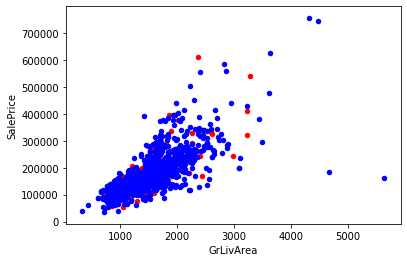

In [34]:
import matplotlib.pyplot as plt

ax=test.plot(kind='scatter',x='GrLivArea',y='SalePrice',color='red')
train.plot(kind='scatter',x='GrLivArea',y='SalePrice',color='blue',ax=ax)
plt.show()

#y_test_pred.plot(kind='scatter',x='GrLivArea',y='SalePrice',color='red')
#plt.show()
#test.plot(kind='scatter',x='GrLivArea',y='SalePrice',color='red')
#plt.show()



### In the overlaid plot,
### Blue color refers to train data
### Red color refers to test data.

# Lasso

<font color='red'>Assignment:</font> Use **Lasso** instead of **LinearRegression** in **Pipeline**. Tune **alpha** in **Lasso** to search for the  alpha that has the lowest test loss, which is your best model. Visualize your best model and calculate its R2 scores.

In [22]:
steps = [('poly', PolynomialFeatures(degree=30)),
         ('rescale', MinMaxScaler()),
         ('lasso', Lasso())]
pipeline_lr = Pipeline(steps)
pipeline_lr = pipeline_lr.fit(X_train, y_train)
pipeline_lr

/Users/aniketh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 681420882793.5706, tolerance: 576452147.1034409
  positive)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=30, include_bias=True,
                                    interaction_only=False, order='C')),
                ('rescale', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [23]:
y_train_pred = pipeline_lr.predict(X_train)
y_train_pred

array([202355.26157721, 210246.76961197, 203081.34482446, 254947.46251818,
       165666.81804961, 200695.69279421, 242704.09739181, 208998.82687301,
       128754.81897248, 269976.92810132, 112779.4152532 , 179811.06688144,
       153618.39394859, 163156.0112288 , 276458.09216394, 136908.25476727,
       190928.5265879 , 190928.5265879 , 150797.31417388, 151476.50054772,
       286262.83994333, 135603.98631648, 158528.96421925, 161509.92289412,
       161949.56204151, 109167.45180321, 249328.16736755, 196752.55597155,
       118242.31229068, 177268.67585013, 144852.25440699, 216088.11603743,
       172469.15907001, 203392.53963383, 361588.3337051 , 142768.7872812 ,
       137263.00947435, 236542.06455408, 265469.24379498, 257859.92571815,
       104062.46612535, 157196.36910364, 151023.86091835, 248534.50056224,
       131777.87336624, 281696.4347561 , 183184.58481046, 122615.92701656,
       128754.81897248, 151589.56628113, 119373.11105093, 210246.76961197,
       189677.19531116, 1

<font color='red'>Question:</font> **Alpha** is a hyper parameter. What is hyper parameter? 

### Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. The prefix ‘hyper_’ suggests that they are ‘top-level’ parameters that control the learning process and the model parameters that result from it.



<font color='red'>Question:</font> How does **alpha** affect model complexity?

### When creating a model, our goal is to locate the optimum model complexity.
### If our model complexity exceeds this sweet spot, we are in effect overfitting our model;
### while if our complexity falls short of the sweet spot, we are underfitting the model.

<font color='red'>Question:</font> How does **alpha** affect the coefficient values?

# Ridge

<font color='red'>Assignment:</font> Try **Ridge** instead of **Lasso**.

In [24]:
steps = [('poly', PolynomialFeatures(degree=30)),
         ('rescale', MinMaxScaler()),
         ('ridge', Ridge())]
pipeline_lr = Pipeline(steps)
pipeline_lr = pipeline_lr.fit(X_train, y_train)
pipeline_lr

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=30, include_bias=True,
                                    interaction_only=False, order='C')),
                ('rescale', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [25]:
y_train_pred = pipeline_lr.predict(X_train)
y_train_pred

array([199515.28819994, 207498.13470299, 200246.38039946, 252531.90096844,
       164219.03044167, 197847.38738878, 240437.58874448, 206231.04210282,
       133337.36247359, 266902.7398399 , 121516.93223898, 177367.2878287 ,
       153578.28216441, 161957.55410895, 272915.2204016 , 139720.89605245,
       188137.07659542, 188137.07659542, 151164.99444675, 151743.26223418,
       281788.03315558, 138683.32530714, 157850.28340998, 160487.35761533,
       160879.04940583, 118964.84052809, 247019.08374561, 193903.74403048,
       125459.60416119, 174955.10858692, 146177.61519651, 213444.31039331,
       170458.2074963 , 200559.9640501 , 341714.96613248, 144461.31529309,
       140004.20212394, 234247.68108491, 262653.63918989, 255360.93544344,
       115430.03032166, 156682.06968832, 151357.68580322, 246235.00784335,
       135675.79463316, 277689.3167254 , 180598.5629944 , 128689.79854698,
       133337.36247359, 151839.69671459, 126288.41648984, 207498.13470299,
       186908.31184928, 1

<font color='red'>Question:</font> What is regularization? How does it work?

### In Regularization,the number of features in a model  are penalized in order to only keep the most important features.

### This can be particularly important when the dataset has 100,000+ features.

<font color='red'>Question:</font> What are "L1" and "L2" regularizations, respectively? How are the effects on coefficients from **Ridge** and **Lasso** different?

### L1 regularization penalizes the sum of absolute values of the weights
### whereas L2 regularization penalizes the sum of squares of the weights. 
### The L1 regularization solution is sparse. The L2 regularization solution is non-sparse.
### L2 regularization doesn’t perform feature selection, since weights are only reduced to values near 0 instead of ### L1 regularization has built-in feature selection.
### L1 regularization is robust to outliers, L2 regularization is not. 



### Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models.
### On the other hand, L2 regularization (e.g. Ridge regression) doesn’t result in elimination of coefficients or sparse models. This makes the Lasso far easier to interpret than the Ridge.


